# Numerov scheme

## Numerov forward scheme

$$ \psi_i = \frac { \left( 1 - \frac{5}{12} \Delta x^2 k^2(x - \Delta x) \right) \psi_{i-1} + \left( 1 + \frac{1}{12} \Delta x^2 k^2(x - 2\Delta x) \right) \psi_{i-2} } { 1 + \frac{1}{12} \Delta x^2 k^2(x) } $$

We iterate from $i=2$ to $N$, where $N$ is total number of points on lattice.

<p></p>

## Numerov backward scheme

$$ \psi_i = \frac { \left( 1 - \frac{5}{12} \Delta x^2 k^2(x + \Delta x) \right) \psi_{i+1} + \left( 1 + \frac{1}{12} \Delta x^2 k^2(x + 2\Delta x) \right) \psi_{i+2} } { 1 + \frac{1}{12} \Delta x^2 k^2(x) } $$

We iterate from $i=N-2$ to $0$, where $N$ is total number of points on lattice.

<p></p>

$\left[\frac{\hbar^2}{2m^*} \nabla^2 + V(x) \right] \psi_n = \varepsilon_n \psi_n$

$\left[\varepsilon_n - V(x) \right] \psi_n = \frac{\hbar^2}{2m^*} \nabla^2 \psi_n$

$ \frac{2m^*}{\hbar^2} \left[\varepsilon_n - V(x) \right] \psi_n = \nabla^2 \psi_n$

$ k^2(x) \psi_n = \nabla^2 \psi_n$

$$ k^2(x) = \frac{2m^*(x)}{\hbar^2} \left[\varepsilon_n - V(x) \right] $$

# Testing Numerov scheme implementation

## Harmonic oscilator


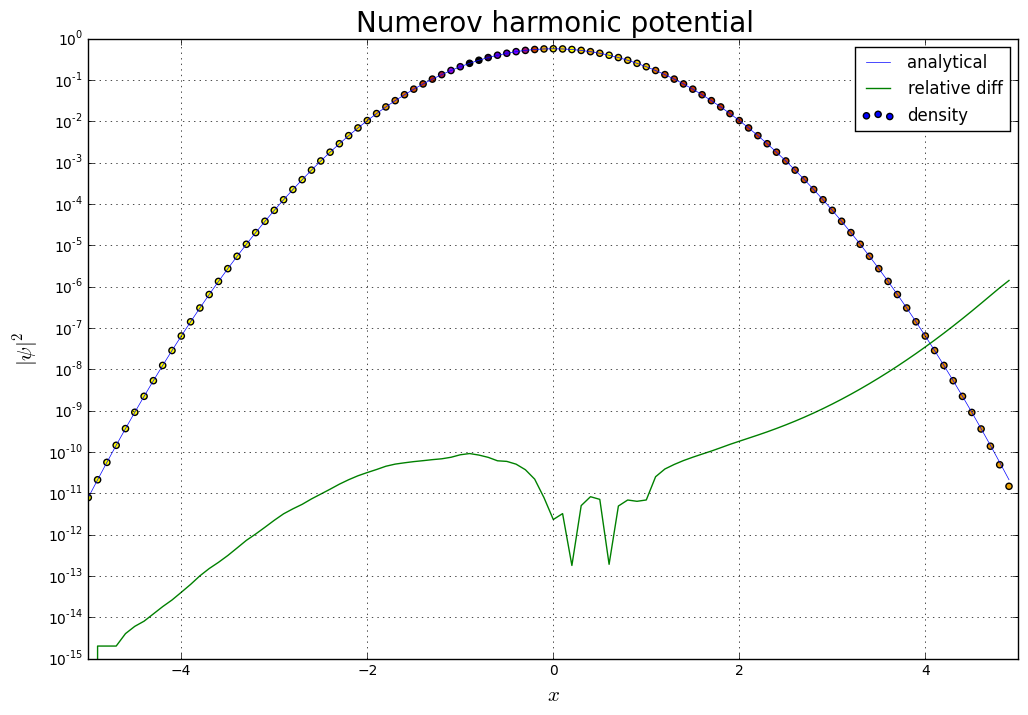

In [91]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

data = np.loadtxt('harmonic_E0.5.dat')

x = data[:,0]
psi_re = data[:,1]
psi_im = data[:,2]

plt.figure(figsize=[12.,8.])
plt.title(r'Numerov harmonic potential',fontsize=20)
plt.grid(True)
plt.xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$\vert \psi \vert^2$',fontsize=15)
plt.xlim([np.min(x),np.max(x)])
#plt.ylim([np.min(psi_re**2+psi_im**2),np.max(psi_re**2+psi_im**2)])
plt.yscale('log')

z = np.abs(psi_re**2+psi_im**2 - data[:,3]**2)
plt.plot(x[::1000],(data[:,3]**2)[::1000],label='analytical',marker='',
         linewidth=.5)
plt.plot(x[::1000],np.abs(psi_re**2+psi_im**2 - data[:,3]**2)[::1000]/data[::1000,3],
         label='relative diff')
plt.scatter(x[::1000],(psi_re**2+psi_im**2)[::1000],c=z[::1000],
            label='density',marker='o', cmap='gnuplot_r')
plt.legend(loc='upper right')
plt.show()

(0.49, 0.51)


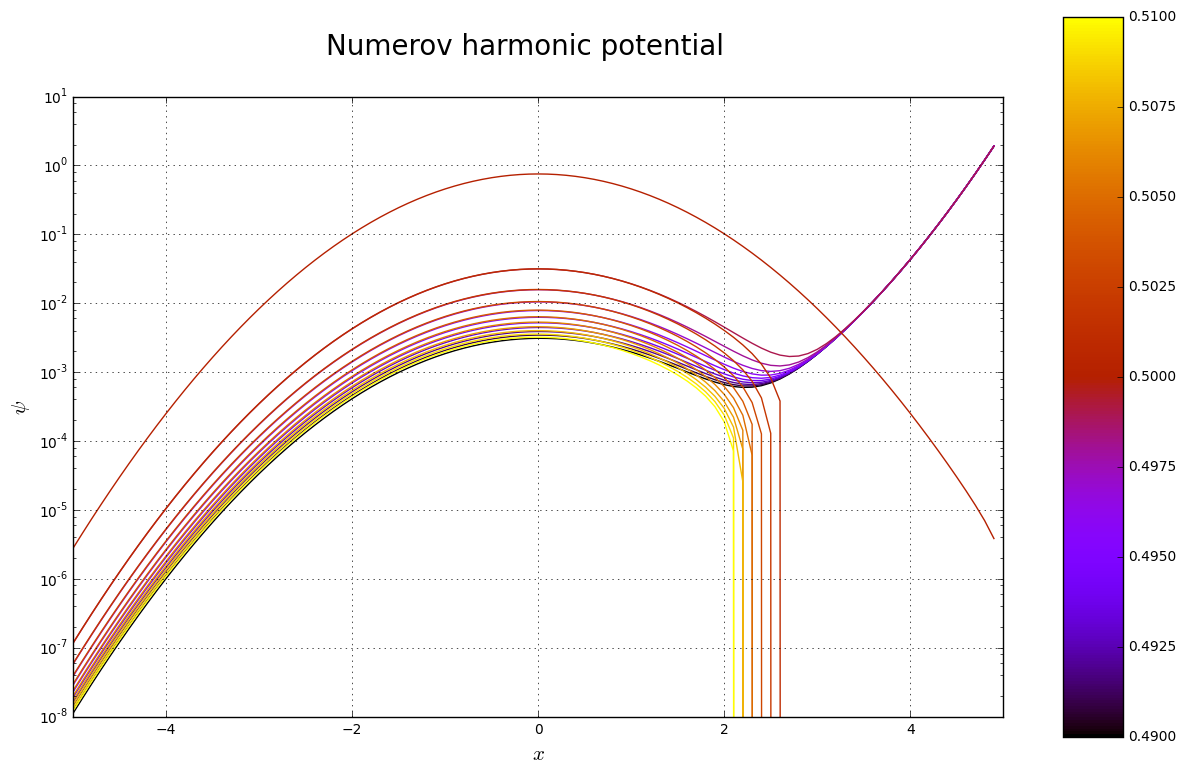

In [98]:
import glob
import matplotlib.colors
import matplotlib.cm
import matplotlib.colorbar


fig, ax1 = plt.subplots(figsize=(12, 8))
plt.suptitle(r'Numerov harmonic potential',fontsize=20)
ax1.grid(True)
ax1.set_xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$\psi$',fontsize=15)
ax1.set_xlim([np.min(x),np.max(x)])
#ax1.set_ylim([255*np.min(psi_re**2+psi_im**2),np.max(psi_re**2+psi_im**2)])
ax1.set_yscale('log')

cm = plt.get_cmap('gnuplot')
cNorm  = matplotlib.colors.Normalize(vmin=0.49, vmax=0.51)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)
print(scalarMap.get_clim())

for ii,f in enumerate(sorted(glob.glob('harmonic_E*.dat'))):
    data = np.loadtxt(f)
    
    x = data[:,0]
    psi_re = data[:,1]
    psi_im = data[:,2]
    
    colorVal = scalarMap.to_rgba(0.49 +ii*0.001)
    ax1.plot(x[::1000],psi_re[::1000],color=colorVal)
    #,s=0.5*np.ones_like(x[::1000])
#plt.legend(loc='upper right')
ax2 = fig.add_axes([0.95, 0.10, 0.05, 0.90])
matplotlib.colorbar.ColorbarBase(ax2, cmap=cm,norm=cNorm,orientation='vertical')
plt.show()

### Backward Numerov scheme

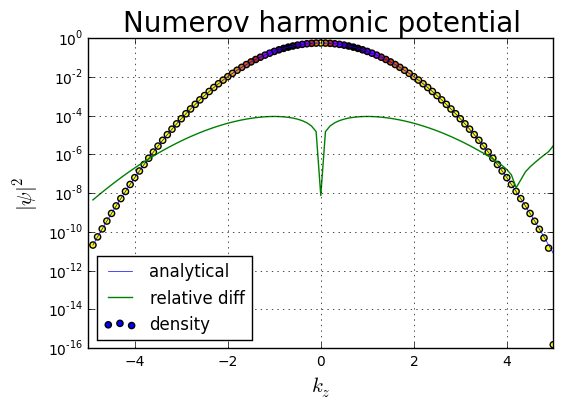

In [13]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

data = np.loadtxt('harmonic_backward_E0.5.dat')

x = data[:,0]
psi_re = data[:,1]
psi_im = data[:,2]

plt.title(r'Numerov harmonic potential',fontsize=20)
plt.grid(True)
plt.xlabel(r'$k_z$',fontsize=15)
plt.ylabel(r'$\vert \psi \vert^2$',fontsize=15)
plt.xlim([np.min(x),np.max(x)])
#plt.ylim([np.min(psi_re**2+psi_im**2),np.max(psi_re**2+psi_im**2)])

z = np.abs(psi_re**2+psi_im**2 - data[:,3]**2)
plt.yscale('log')
plt.plot(x[::1000],(data[:,3]**2)[::1000],label='analytical',marker='',
         linewidth=.5)
plt.plot(x[::1000],np.abs(psi_re**2+psi_im**2 - data[:,3]**2)[::1000]/data[::1000,3],
         label='relative diff')
plt.scatter(x[::1000],(psi_re**2+psi_im**2)[::1000],c=z[::1000],
            label='density',marker='o', cmap='gnuplot_r')
plt.legend(loc='lower left')
plt.show()

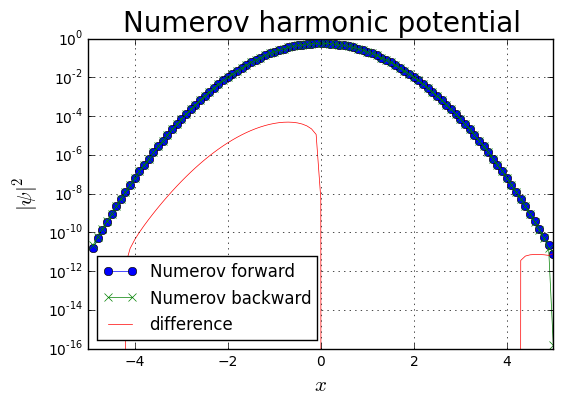

In [3]:
data_fwd = np.loadtxt('harmonic_E0.5.dat')
x = data_fwd[:,0]
density_fwd = data_fwd[:,1]**2 + data_fwd[:,2]**2

data_bck = np.loadtxt('harmonic_backward_E0.5.dat')
x = data_bck[:,0]
density_bck = data_bck[:,1]**2 + data_bck[:,2]**2

plt.title(r'Numerov harmonic potential',fontsize=20)
plt.grid(True)
plt.xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$\vert \psi \vert^2$',fontsize=15)
plt.xlim([np.min(x),np.max(x)])
#plt.ylim([np.min(psi_re**2+psi_im**2),np.max(psi_re**2+psi_im**2)])

plt.yscale('log')
plt.plot(x[::1000],density_fwd[::1000],label='Numerov forward',  marker='o',linewidth=.5)
plt.plot(x[::1000],density_bck[::1000],label='Numerov backward', marker='x',linewidth=.5)
plt.plot(x[::1000],density_fwd[::1000]-density_bck[::1000],
                                       label='difference',       marker='',linewidth=.5)
plt.legend(loc='lower left')
plt.show()

In [5]:
print(np.sum(density_fwd-density_bck)/density_fwd.size)

1.77852337444e-15


# Potential well

(-200, 0.0)
<class 'numpy.core.memmap.memmap'>
4096 4096
(7, 4096)
-196.5468 meV
0.0183755621783
-186.2101 meV
0.0183358686781
-169.0639 meV
0.0182625799493
-145.2513 meV
0.0181408018228
-115.0292 meV
0.0179374485629
-78.88944 meV
0.017564574371
-38.00363 meV
0.0166712272617


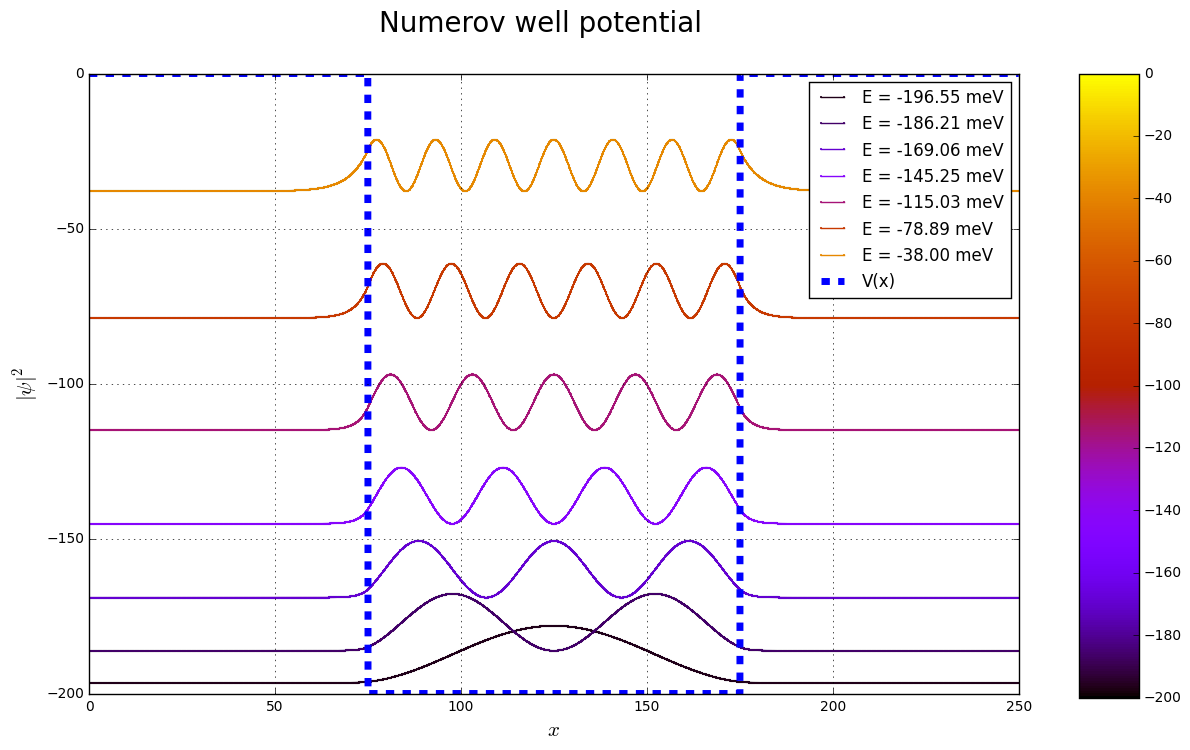

In [38]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import matplotlib.colorbar
import glob

%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.suptitle(r'Numerov well potential',fontsize=20)
ax1.grid(True)
ax1.set_xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$\vert\psi\vert^2$',fontsize=15)
#ax1.set_xlim([np.min(x),np.max(x)])
#ax1.set_ylim([255*np.min(psi_re**2+psi_im**2),np.max(psi_re**2+psi_im**2)])
#ax1.set_yscale('log')

cm = plt.get_cmap('gnuplot')
cNorm  = matplotlib.colors.Normalize(vmin=-200, vmax=0.0)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)
print(scalarMap.get_clim())

#print(sorted(glob.glob('data/well_fwd*.bin')))
#print(sorted(glob.glob('data/well_bck*.bin')))

energies = np.loadtxt('energies.dat')

potential = np.loadtxt('potential_well.dat')
x = potential[:,0]
potential = potential[:,1]
#np.linspace(-125.,125.,potential.size,endpoint=True)
#plt.plot(x,potential,label='V(x)',linestyle='--',linewidth=5)
Nx = potential.size

psi = np.memmap('wavefunctions.bin',dtype=np.complex128)
print(type(psi))
print(psi.shape[0]/energies.size,Nx)
psi = np.reshape(psi,[energies.size,Nx])
print(psi.shape)

density = np.abs(psi)**2

for it in range(energies.size):
    #density = np.abs(psi[it,:])**2
    #density = (100/(it+1))*density/np.max(density[int(trunc*Nx):int((1-trunc)*Nx)])
    #density[it,:] = density[it,:]/np.max(density[it,:])
    E = energies[it]
    print(E,'meV')
    #print(density[::32])
    print(np.max(np.max(density[it,:])))
    colorVal = scalarMap.to_rgba(E)
    ax1.plot(x,1000*density[it,:]+E,
             color=colorVal,marker='.',markersize=2.0,label='E = {:.2f} meV'.format(E))
ax2 = fig.add_axes([0.95, 0.12, 0.05, 0.78])
matplotlib.colorbar.ColorbarBase(ax2, cmap=cm,norm=cNorm,orientation='vertical')
ax1.plot(x,potential,label='V(x)',linestyle='--',linewidth=5)
#ax1.set_ylim([0.,0.0002])
#ax3.set_ylim([-210.0, 10.0])
ax1.legend()
plt.show()

# Well with external electric field

(-200, 0.0)
<class 'numpy.core.memmap.memmap'>
4096 4096
(7, 4096)
-196.9156 meV
0.019520782308
-186.1178 meV
0.0198880690462
-169.0262 meV
0.0193109173685
-145.2792 meV
0.0187893293722
-115.1805 meV
0.0183111809222
-79.41112 meV
0.0175855578509
-40.1979 meV
0.0152033514818


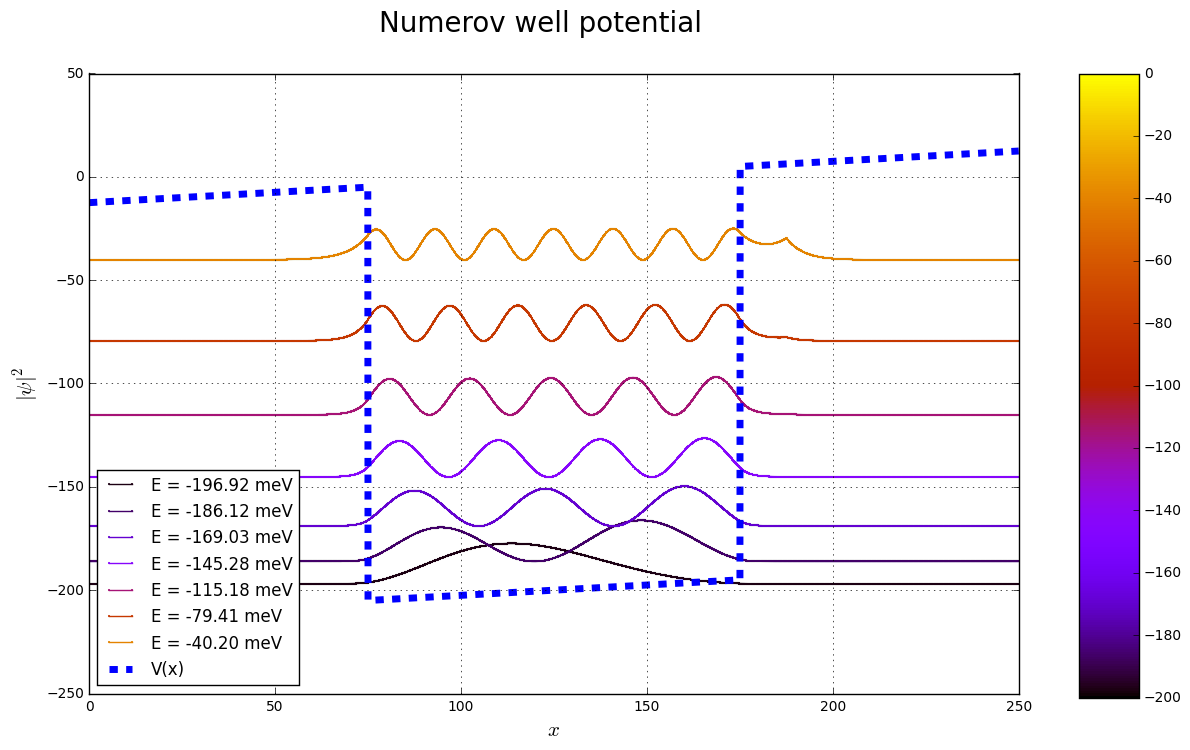

In [53]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import matplotlib.colorbar
import glob

%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.suptitle(r'Numerov well potential',fontsize=20)
ax1.grid(True)
ax1.set_xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$\vert\psi\vert^2$',fontsize=15)
#ax1.set_xlim([np.min(x),np.max(x)])
#ax1.set_ylim([255*np.min(psi_re**2+psi_im**2),np.max(psi_re**2+psi_im**2)])
#ax1.set_yscale('log')

cm = plt.get_cmap('gnuplot')
cNorm  = matplotlib.colors.Normalize(vmin=-200, vmax=0.0)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)
print(scalarMap.get_clim())

#print(sorted(glob.glob('data/well_fwd*.bin')))
#print(sorted(glob.glob('data/well_bck*.bin')))

energies = np.loadtxt('energies_eF.dat')

potential = np.loadtxt('potential_well_eF.dat')
x = potential[:,0]
potential = potential[:,1]
#np.linspace(-125.,125.,potential.size,endpoint=True)
#plt.plot(x,potential,label='V(x)',linestyle='--',linewidth=5)
Nx = potential.size

psi = np.memmap('wavefunctions_eF.bin',dtype=np.complex128)
print(type(psi))
print(psi.shape[0]/energies.size,Nx)
psi = np.reshape(psi,[energies.size,Nx])
print(psi.shape)

density = np.abs(psi)**2

for it in range(energies.size):
    #density = np.abs(psi[it,:])**2
    #density = (100/(it+1))*density/np.max(density[int(trunc*Nx):int((1-trunc)*Nx)])
    #density[it,:] = density[it,:]/np.max(density[it,:])
    E = energies[it]
    print(E,'meV')
    #print(density[::32])
    print(np.max(np.max(density[it,:])))
    colorVal = scalarMap.to_rgba(E)
    ax1.plot(x,1000*density[it,:]+E,
             color=colorVal,marker='.',markersize=2.0,label='E = {:.2f} meV'.format(E))
ax2 = fig.add_axes([0.95, 0.12, 0.05, 0.78])
matplotlib.colorbar.ColorbarBase(ax2, cmap=cm,norm=cNorm,orientation='vertical')
ax1.plot(x,potential,label='V(x)',linestyle='--',linewidth=5)
#ax1.set_ylim([0.,0.0002])
#ax3.set_ylim([-210.0, 10.0])
ax1.legend(loc='lower left')
plt.show()